## 1. Dataset Information



This dataset provides a balanced collection of images of benign and malignant skin moles, designed to support skin cancer diagnosis research and applications.

### Dataset Content
- **Images**: The dataset includes **3,600 images** with equal representation of both benign and malignant moles.
  - **Image Size**: All images are of resolution **224x224 pixels**.
  - **Categories**:
    - **Benign Moles**: 1,800 images
    - **Malignant Moles**: 1,800 images

### Skin Cancer Types

####  **Benign Moles**
Benign moles, also known as **nevi**, are non-cancerous skin growths that do not pose any immediate threat to health. They typically appear as small, brown, or tan spots on the skin. Although benign moles are usually harmless, it's important to monitor changes in size, color, or shape, as these changes could indicate the early development of skin cancer.

####  **Malignant Moles**
Malignant moles, also referred to as **melanomas**, are cancerous skin growths that can be life-threatening if not detected early. Melanoma arises from melanocytes, the cells responsible for producing pigment in the skin. Malignant moles can vary in appearance, but common warning signs include asymmetry, irregular borders, multiple colors, and a diameter larger than a pencil eraser. Early detection and treatment are crucial for improving survival rates.

### Usage Rights
The dataset is governed by the **ISIC-Archive rights**. For more details, please refer to the official [ISIC Archive](https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main).




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2. Data Visualization

### 2.1 Dataset Sample

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your test directory
vis_dir = '/content/drive/MyDrive/Personal/Projects/CNN/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (748029212.py, line 7)

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The images have a size of 224 by 224, which is suitable for CNN models, so there is no need to resize them. However, we will include the resizing code later on in case you need it for a special dataset.
</div>

### 2.2 Training Data Distribution

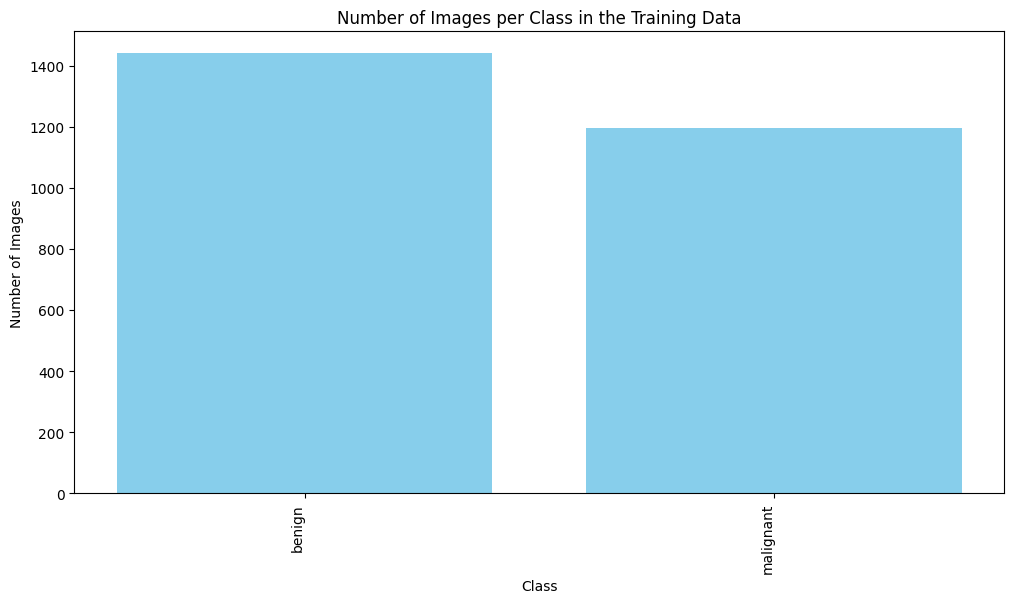

In [ ]:
# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 As you can see, the dataset is balanced. There is a slight difference between the two classes, but it's not an extreme difference.
</div>

### 2.3 Test Data Distribution

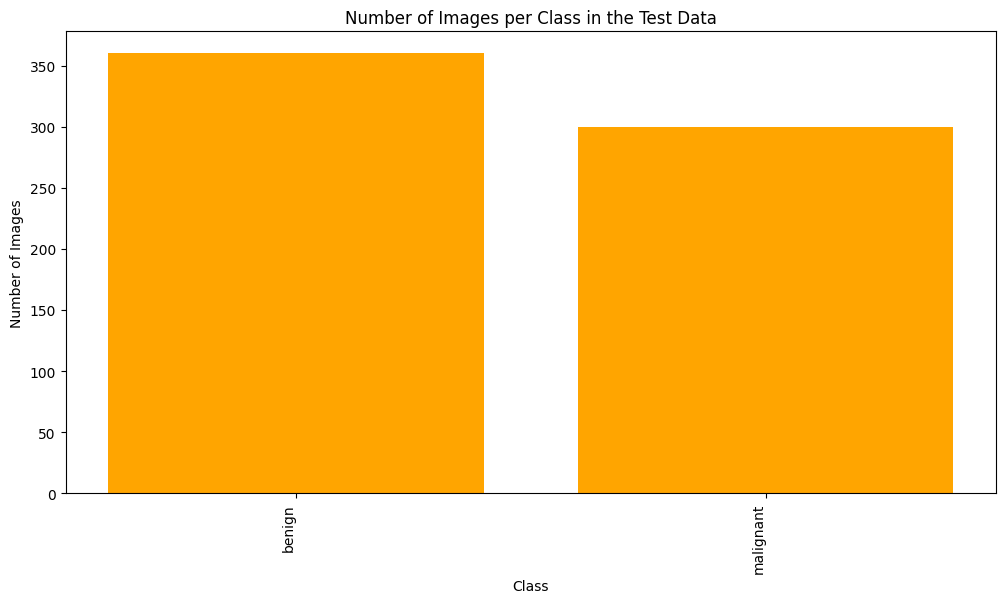

In [ ]:
test_vis_dir = '/content/drive/MyDrive/Personal/Projects/CNN/test'
# test_vis_dir = ''

# Get the list of all subdirectories (classes)
classes = os.listdir(test_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(test_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='orange')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Test Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The same applies to the test data, which means we can rely on accuracy as a metric to evaluate the model.
</div>

## 3. Resizing Images

### 3.1 Resizing Images to 224x224 Pixels

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    ⚠️ This resizing step is absolutely not necessary for this dataset, as all the images are already 224 by 224 and we will be using this same size for our models. However, we chose to include this code in case you opt to use a different size, such as 64x64.

</div>

In [ ]:
import os
from PIL import Image

# Define paths
input_dirs = {
    'train': '/content/drive/MyDrive/Personal/Projects/CNN/train',
    'test': '/content/drive/MyDrive/Personal/Projects/CNN/test'
}
output_dir = './output'

# Create output directory and subdirectories if they don't exist
for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(224, 224)):
    try:
        with Image.open(input_path) as img:
            # Handle images with Transparency in Palette mode
            if img.mode == 'P':
                img = img.convert('RGBA')
            # Convert image to RGB if it has an alpha channel or is Palette based
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format='JPEG')
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        # Create the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")

Resizing and saving images completed.


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 All the resized images are saved to the output folder.
</div>

## 4. Data Generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define paths
train_dir = './output/train'
test_dir = './output/test'


# Create an instance of the ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
# Create an instance of the ImageDataGenerator for the test set (usually without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    seed= 777,
    target_size=(224, 224),  # Resize all images to 150x150 pixels
    batch_size=20,           # Number of images to yield per batch
    class_mode='binary' # Since we have only 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    seed= 777,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

2024-08-22 19:01:53.907181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 19:01:53.907278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 19:01:54.026601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


## 5. Implementing Transfer Learning

In [ ]:
from tensorflow.keras.applications import Xception, ResNet50, VGG16, InceptionV3, DenseNet121
from tensorflow.keras.applications import MobileNet, MobileNetV2, NASNetMobile, EfficientNetB0, EfficientNetB3, EfficientNetB4, ResNet101, ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

def create_model(base_model_class, input_shape=(224, 224, 3)):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.8)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# List of models to try
models = [
    ('Xception', Xception),
    ('ResNet50', ResNet50),
    ('VGG16', VGG16),
    ('InceptionV3', InceptionV3),
    ('DenseNet121', DenseNet121),
    ('MobileNet', MobileNet),
    ('MobileNetV2', MobileNetV2),
    ('NASNetMobile', NASNetMobile),
    ('EfficientNetB0', EfficientNetB0),
    ('EfficientNetB3', EfficientNetB3),
    ('EfficientNetB4', EfficientNetB4),
    ('ResNet101', ResNet101),
    ('ResNet152', ResNet152),

]


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_name = None
best_val_accuracy = 0

for model_name, model_class in models:
    print(f"Training {model_name}...")

    model = create_model(model_class)

    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        verbose=2,
        callbacks=[checkpoint]
    )

    # Evaluate the model on the validation set
    val_accuracy = max(history.history['val_accuracy'])

    # Save the best model based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_name = model_name

    print(f"{model_name} validation accuracy: {val_accuracy}")

print(f"The best performing model is {best_model_name} with a validation accuracy of {best_val_accuracy}")


Training Xception...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


I0000 00:00:1724353348.209316      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724353348.253942      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724353367.020770      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.77727, saving model to Xception_best_model.keras
132/132 - 39s - 299ms/step - accuracy: 0.7057 - loss: 0.7507 - val_accuracy: 0.7773 - val_loss: 0.4504
Epoch 2/10

Epoch 2: val_accuracy improved from 0.77727 to 0.81515, saving model to Xception_best_model.keras
132/132 - 9s - 66ms/step - accuracy: 0.7562 - loss: 0.5865 - val_accuracy: 0.8152 - val_loss: 0.3908
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.81515
132/132 - 8s - 61ms/step - accuracy: 0.7755 - loss: 0.5085 - val_accuracy: 0.7970 - val_loss: 0.4121
Epoch 4/10

Epoch 4: val_accuracy improved from 0.81515 to 0.81818, saving model to Xception_best_model.keras
132/132 - 9s - 66ms/step - accuracy: 0.7884 - loss: 0.4574 - val_accuracy: 0.8182 - val_loss: 0.3746
Epoch 5/10

Epoch 5: val_accuracy improved from 0.81818 to 0.82273, saving model to Xception_best_model.keras
132/132 - 9s - 67ms/step - accuracy: 0.8028 - loss: 0.4185 - val_accuracy: 0.8227 - val_loss: 0.3653
Epoc

W0000 00:00:1724353465.579263      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724353482.293497      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.45455, saving model to ResNet50_best_model.keras
132/132 - 35s - 268ms/step - accuracy: 0.7292 - loss: 0.6824 - val_accuracy: 0.4545 - val_loss: 1.4403
Epoch 2/10

Epoch 2: val_accuracy improved from 0.45455 to 0.46970, saving model to ResNet50_best_model.keras
132/132 - 7s - 51ms/step - accuracy: 0.7490 - loss: 0.5648 - val_accuracy: 0.4697 - val_loss: 0.7147
Epoch 3/10

Epoch 3: val_accuracy improved from 0.46970 to 0.65606, saving model to ResNet50_best_model.keras
132/132 - 7s - 51ms/step - accuracy: 0.7691 - loss: 0.5153 - val_accuracy: 0.6561 - val_loss: 0.5625
Epoch 4/10

Epoch 4: val_accuracy improved from 0.65606 to 0.66364, saving model to ResNet50_best_model.keras
132/132 - 7s - 51ms/step - accuracy: 0.7873 - loss: 0.4825 - val_accuracy: 0.6636 - val_loss: 0.6329
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.66364
132/132 - 9s - 70ms/step - accuracy: 0.7823 - loss: 0.4666 - val_accuracy: 0.4561 - val_loss: 2.1655
Epoc

2024-08-22 19:05:50.638697: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50176: 3.79983, expected 3.15789
2024-08-22 19:05:50.638759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50177: 5.13466, expected 4.49272
2024-08-22 19:05:50.638769: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50178: 4.78155, expected 4.13961
2024-08-22 19:05:50.638777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50179: 4.88295, expected 4.24101
2024-08-22 19:05:50.638786: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50180: 4.73279, expected 4.09085
2024-08-22 19:05:50.638794: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50181: 4.69943, expected 4.05749
2024-08-22 19:05:50.638801: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50182: 4.1975, expected 3.55556
2024-08-22 19:05:50.638823: 


Epoch 1: val_accuracy improved from -inf to 0.78939, saving model to VGG16_best_model.keras
132/132 - 39s - 294ms/step - accuracy: 0.7550 - loss: 0.6237 - val_accuracy: 0.7894 - val_loss: 0.4987
Epoch 2/10

Epoch 2: val_accuracy improved from 0.78939 to 0.80909, saving model to VGG16_best_model.keras
132/132 - 9s - 68ms/step - accuracy: 0.7766 - loss: 0.5483 - val_accuracy: 0.8091 - val_loss: 0.4101
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.80909
132/132 - 10s - 74ms/step - accuracy: 0.7823 - loss: 0.4713 - val_accuracy: 0.8076 - val_loss: 0.3936
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.80909
132/132 - 9s - 65ms/step - accuracy: 0.7801 - loss: 0.4428 - val_accuracy: 0.8000 - val_loss: 0.4003
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.80909
132/132 - 9s - 65ms/step - accuracy: 0.7941 - loss: 0.4254 - val_accuracy: 0.8061 - val_loss: 0.4163
Epoch 6/10

Epoch 6: val_accuracy improved from 0.80909 to 0.83333, saving model to VGG16_best_model.ke

W0000 00:00:1724353692.529262      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724353716.680838      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.79394, saving model to InceptionV3_best_model.keras
132/132 - 50s - 375ms/step - accuracy: 0.7144 - loss: 0.7216 - val_accuracy: 0.7939 - val_loss: 0.4775
Epoch 2/10

Epoch 2: val_accuracy improved from 0.79394 to 0.82121, saving model to InceptionV3_best_model.keras
132/132 - 7s - 55ms/step - accuracy: 0.7490 - loss: 0.5946 - val_accuracy: 0.8212 - val_loss: 0.3935
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.82121
132/132 - 6s - 46ms/step - accuracy: 0.7903 - loss: 0.4805 - val_accuracy: 0.7985 - val_loss: 0.4134
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.82121
132/132 - 6s - 46ms/step - accuracy: 0.7967 - loss: 0.4261 - val_accuracy: 0.8015 - val_loss: 0.4118
Epoch 5/10

Epoch 5: val_accuracy improved from 0.82121 to 0.83788, saving model to InceptionV3_best_model.keras
132/132 - 7s - 54ms/step - accuracy: 0.7952 - loss: 0.4299 - val_accuracy: 0.8379 - val_loss: 0.3800
Epoch 6/10

Epoch 6: val_accuracy did not 

W0000 00:00:1724354772.458192      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724354796.811657      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.45455, saving model to ResNet101_best_model.keras
132/132 - 51s - 385ms/step - accuracy: 0.7251 - loss: 0.7294 - val_accuracy: 0.4545 - val_loss: 1.6971
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.45455
132/132 - 10s - 74ms/step - accuracy: 0.7467 - loss: 0.6098 - val_accuracy: 0.4545 - val_loss: 1.5208
Epoch 3/10

Epoch 3: val_accuracy improved from 0.45455 to 0.75758, saving model to ResNet101_best_model.keras
132/132 - 11s - 86ms/step - accuracy: 0.7509 - loss: 0.5547 - val_accuracy: 0.7576 - val_loss: 0.5342
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.75758
132/132 - 10s - 74ms/step - accuracy: 0.7527 - loss: 0.5323 - val_accuracy: 0.4712 - val_loss: 0.8537
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.75758
132/132 - 10s - 74ms/step - accuracy: 0.7804 - loss: 0.4761 - val_accuracy: 0.5258 - val_loss: 1.0496
Epoch 6/10

Epoch 6: val_accuracy improved from 0.75758 to 0.78485, saving model to ResNet10

W0000 00:00:1724354944.891555      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1724354978.807834      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.45455, saving model to ResNet152_best_model.keras
132/132 - 72s - 546ms/step - accuracy: 0.7311 - loss: 0.6965 - val_accuracy: 0.4545 - val_loss: 0.8189
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.45455
132/132 - 14s - 104ms/step - accuracy: 0.7501 - loss: 0.5850 - val_accuracy: 0.4545 - val_loss: 1.1730
Epoch 3/10

Epoch 3: val_accuracy improved from 0.45455 to 0.55152, saving model to ResNet152_best_model.keras
132/132 - 16s - 122ms/step - accuracy: 0.7782 - loss: 0.5097 - val_accuracy: 0.5515 - val_loss: 1.5693
Epoch 4/10

Epoch 4: val_accuracy improved from 0.55152 to 0.75909, saving model to ResNet152_best_model.keras
132/132 - 16s - 121ms/step - accuracy: 0.7706 - loss: 0.5047 - val_accuracy: 0.7591 - val_loss: 0.4545
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.75909
132/132 - 14s - 105ms/step - accuracy: 0.7911 - loss: 0.4685 - val_accuracy: 0.6045 - val_loss: 1.2011
Epoch 6/10

Epoch 6: val_accuracy did no

## 6. Results


| Model                  | Validation Accuracy |
|------------------------|----------------------|
| DenseNet121            | 0.8621               |
| DenseNet169            | 0.8460               |
| DenseNet201            | 0.8440               |
| InceptionV3            | 0.8530               |
| EfficientNetB0         | 0.8410               |
| InceptionResNetV2      | 0.8420               |
| Xception               | 0.8394               |
| VGG16                  | 0.8333               |
| VGG19                  | 0.8250               |
| MobileNetV2            | 0.7960               |
| NASNetMobile           | 0.7870               |
| MobileNetV3Small       | 0.7850               |
| ResNet101              | 0.7890               |
| ResNet50               | 0.7727               |




<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The best model during the initial test is DenseNet121. We will use this model and train it for more epochs to achieve better results.
</div>

## 7. Training The Winning Model

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

# Load the pre-trained DenseNet121 model with ImageNet weights, without the top (classification) layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce the feature maps
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.8)(x)  # Dropout for regularization
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 units
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)  # Final layer for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_6    │ (None, 230, 230,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_6… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_7    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_7… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,618,561 (32.88 MB)

 Trainable params: 1,577,985 (6.02 MB)

 Non-trainable params: 7,040,576 (26.86 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Save the model with the best validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model on the data
history = model.fit(
    train_generator,
    epochs=150,
    validation_data=test_generator,
    verbose=2,
    callbacks=[checkpoint]  # Include the callback
)

# Save training history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Epoch 1/150

Epoch 1: val_accuracy improved from -inf to 0.85909, saving model to best_model.keras
132/132 - 54s - 406ms/step - accuracy: 0.7512 - loss: 0.6480 - val_accuracy: 0.8591 - val_loss: 0.3466
Epoch 2/150

Epoch 2: val_accuracy did not improve from 0.85909
132/132 - 6s - 49ms/step - accuracy: 0.7884 - loss: 0.5090 - val_accuracy: 0.8409 - val_loss: 0.3779
Epoch 3/150

Epoch 3: val_accuracy did not improve from 0.85909
132/132 - 7s - 50ms/step - accuracy: 0.8051 - loss: 0.4634 - val_accuracy: 0.8545 - val_loss: 0.3188
Epoch 4/150

Epoch 4: val_accuracy improved from 0.85909 to 0.86667, saving model to best_model.keras
132/132 - 8s - 57ms/step - accuracy: 0.8191 - loss: 0.4071 - val_accuracy: 0.8667 - val_loss: 0.3041
Epoch 5/150

Epoch 5: val_accuracy did not improve from 0.86667
132/132 - 7s - 50ms/step - accuracy: 0.8267 - loss: 0.3913 - val_accuracy: 0.8621 - val_loss: 0.3142
Epoch 6/150

Epoch 6: val_accuracy did not improve from 0.86667
132/132 - 7s - 50ms/step - accuracy:

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The model reached a validation accuracy of 88%, which is higher than the initial test result. Better results can be achieved with hyperparameter tuning.
</div>

## 8. Training Results

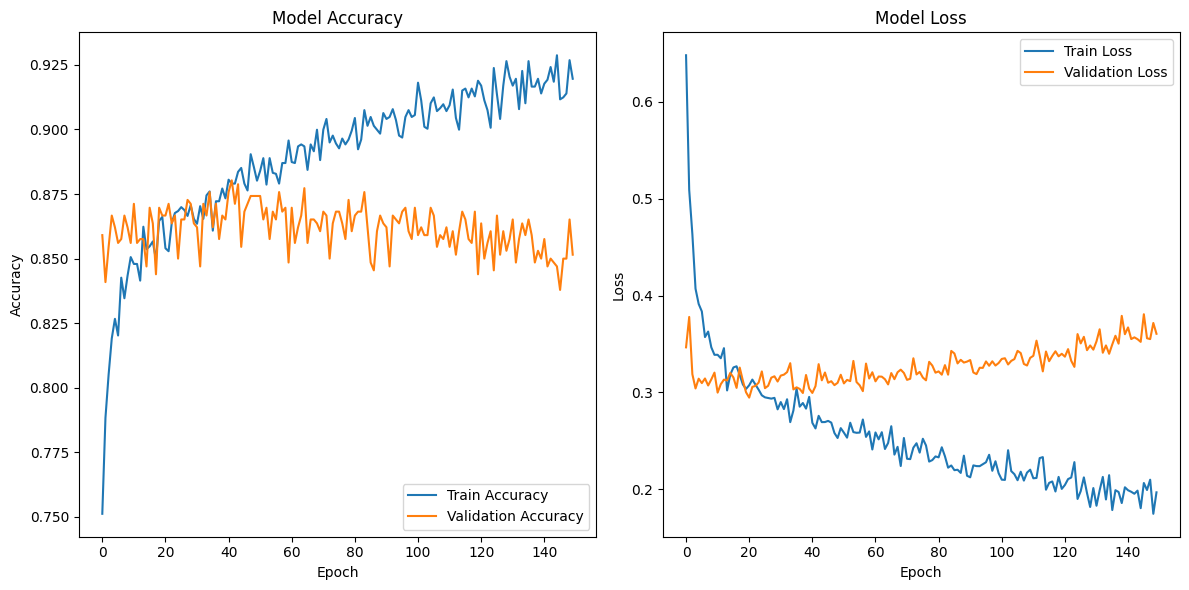

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()
